In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

df= pd.read_csv('/content/zomato.csv',encoding="utf-8",on_bad_lines='skip')

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [144]:
#delete unwanted columns
zomato=df.drop(['url','dish_liked','phone','reviews_list'],axis=1)
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",[],Pubs and bars,Whitefield


In [145]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  menu_item                    51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

In [146]:
#dropping  duplicates rows

zomato.drop_duplicates(inplace=True)
zomato.duplicated().sum()

0

In [147]:
#dropping NaN values from data
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43477 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43477 non-null  object
 1   name                         43477 non-null  object
 2   online_order                 43477 non-null  object
 3   book_table                   43477 non-null  object
 4   rate                         43477 non-null  object
 5   votes                        43477 non-null  int64 
 6   location                     43477 non-null  object
 7   rest_type                    43477 non-null  object
 8   cuisines                     43477 non-null  object
 9   approx_cost(for two people)  43477 non-null  object
 10  menu_item                    43477 non-null  object
 11  listed_in(type)              43477 non-null  object
 12  listed_in(city)              43477 non-null  object
dtypes: int64(1), object(12)
memory usage

In [148]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [149]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

zomato['rate'] = zomato['rate'].apply(handlerate)
zomato['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [150]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [151]:
#filling null values with mean in rate column
zomato['rate'].fillna(zomato['rate'].mean(), inplace = True)
zomato['rate'].isnull().sum()

0

In [155]:
#rename columns approx_cost and listed_in(type)
zomato.rename(columns = {'approx_cost(for two people)':'Cost', 'listed_in(type)':'Type'}, inplace = True)
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,menu_item,Type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet


In [156]:
#location and listed_in(city) have same column drop one column
zomato = zomato.drop(['listed_in(city)'], axis = 1)

KeyError: "['listed_in(city)'] not found in axis"

In [157]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,menu_item,Type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet


In [158]:
zomato["Cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [159]:
#convert cost column to float
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

zomato['Cost'] = zomato['Cost'].apply(handlecomma)
zomato['Cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

In [160]:
rest_types=zomato['rest_type'].value_counts(ascending  = False)

In [162]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Bakery                        775
Beverage Shop                 701
Bar                           650
Food Court                    525
Bar, Casual Dining            407
                             ... 
Bakery, Food Court              2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Quick Bites, Kiosk              1
Name: count, Length: 80, dtype: int64

In [163]:
#Assigning 'other' if value is less than 1000 for rest_type
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

zomato['rest_type'] = zomato['rest_type'].apply(handle_rest_type)
zomato['rest_type'].value_counts()

rest_type
Quick Bites           14993
Casual Dining          9866
others                 8859
Cafe                   3488
Dessert Parlor         1925
Delivery               1775
Takeaway, Delivery     1453
Casual Dining, Bar     1118
Name: count, dtype: int64

In [164]:
#cleaning location column
#zomato['location'].value_counts(ascending  = False)

location = zomato['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

zomato['location'] = zomato['location'].apply(handle_location)
zomato['location'].value_counts()

location
others                   4630
BTM                      4203
Koramangala 5th Block    2356
HSR                      2100
Indiranagar              1883
JP Nagar                 1841
Jayanagar                1709
Whitefield               1677
Marathahalli             1468
Bannerghatta Road        1314
Koramangala 6th Block    1086
Brigade Road             1083
Koramangala 7th Block    1082
Bellandur                1063
Koramangala 1st Block     963
Electronic City           953
Sarjapur Road             905
Ulsoor                    898
Koramangala 4th Block     864
MG Road                   818
Banashankari              803
Kalyan Nagar              742
Malleshwaram              657
Basavanagudi              628
Richmond Road             626
Residency Road            605
Brookefield               579
Frazer Town               572
Church Street             549
New BEL Road              521
Kammanahalli              517
Lavelle Road              489
Rajajinagar               487
B

In [165]:
#cleaning Cuisines Column
#zomato['cuisines'].value_counts(ascending  = False)
cuisines = zomato['cuisines'].value_counts(ascending  = False)

cuisines_lessthan100 = cuisines[cuisines<100]

def cuisines_data(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

zomato['cuisines'] = zomato['cuisines'].apply(cuisines_data)
zomato['cuisines'].value_counts()


cuisines
others                                24053
North Indian                           2243
North Indian, Chinese                  2029
South Indian                           1317
Bakery, Desserts                        642
                                      ...  
North Indian, Chinese, Continental      109
Beverages, Desserts                     107
Kerala, South Indian                    103
Italian, Pizza                          101
Cafe, Bakery                            100
Name: count, Length: 64, dtype: int64

In [169]:
#Establish DB connection

connection = sqlite3.connect("Zomato_db.db")


In [170]:
print(connection.total_changes)

0


In [171]:

zomato.to_sql("zomato", connection, if_exists="replace")

43477

In [172]:
# SQLite cursor
cursor = connection.cursor()

# Execute the SELECT statement to fetch all data from the table
cursor.execute("SELECT * FROM zomato")


# Fetch all rows
rows = cursor.fetchall()

# Get column names from cursor description
columns = [col[0] for col in cursor.description]

# Construct DataFrame from fetched data and column names
data1 = pd.DataFrame(rows, columns=columns)


# Close cursor and connection
cursor.close()

# Print the rows (or process them as needed)
# for row in rows:
#     print(row)
# Print the DataFrame
data1

,index,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,menu_item,Type
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,[],Buffet
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,[],Buffet
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,[],Buffet
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43472,51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,[],Pubs and bars
43473,51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar",others,800.0,[],Pubs and bars
43474,51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,others,Continental,1500.0,[],Pubs and bars
43475,51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,others,others,Finger Food,2500.0,[],Pubs and bars


<ipython-input-183-a692244dafcf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='deep')


Text(0.5, 0, 'Number of outlets')

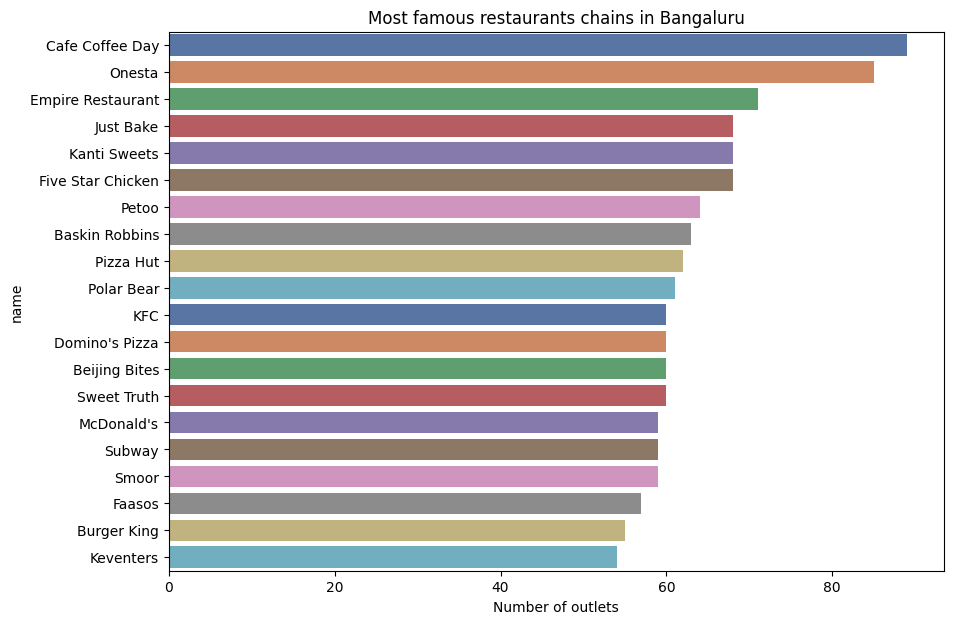

In [183]:
plt.figure(figsize=(10,7))
chains=data1['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

<Axes: xlabel='online_order', ylabel='rate'>

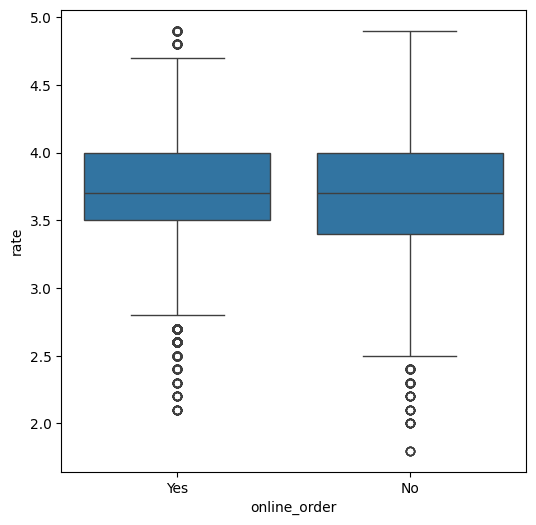

In [175]:
#Online order and rating
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = data1)

<Axes: xlabel='book_table', ylabel='rate'>

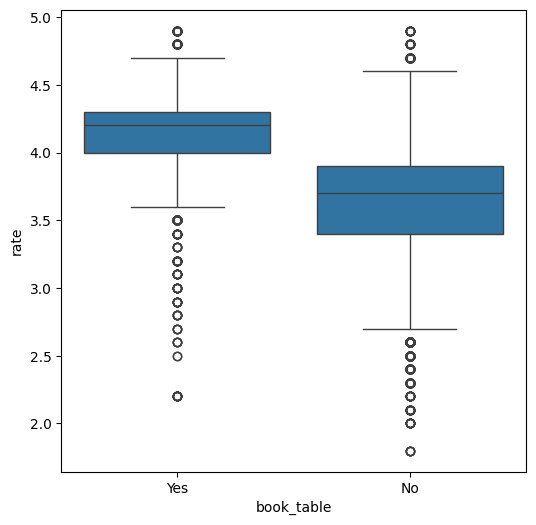

In [176]:
#dinning and rating
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = data1)

<Axes: xlabel='name'>

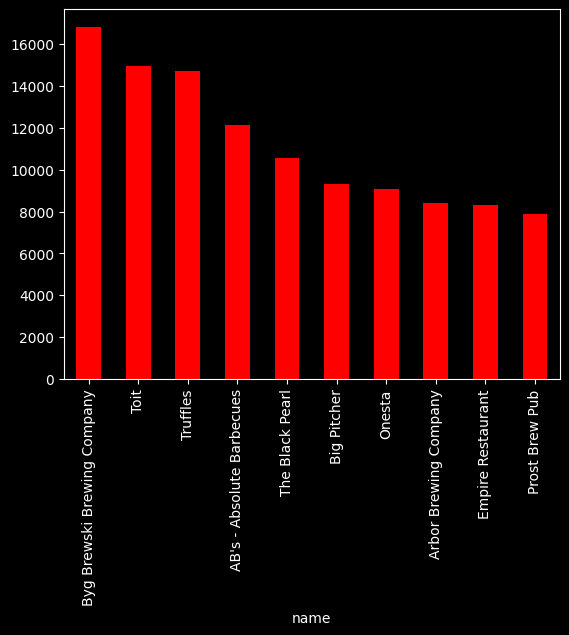

In [202]:
#Highest voted restaurant
data1.groupby('name')['votes'].max().nlargest(10).plot.bar(color='red')

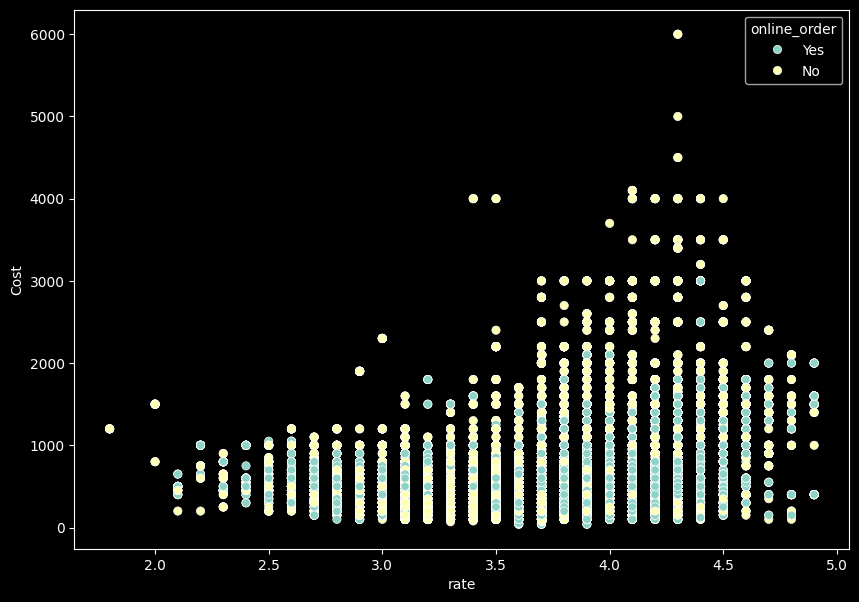

In [204]:
#Cost vs Rating
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='Cost',hue='online_order',data=data1)
plt.show()

<Axes: xlabel='location'>

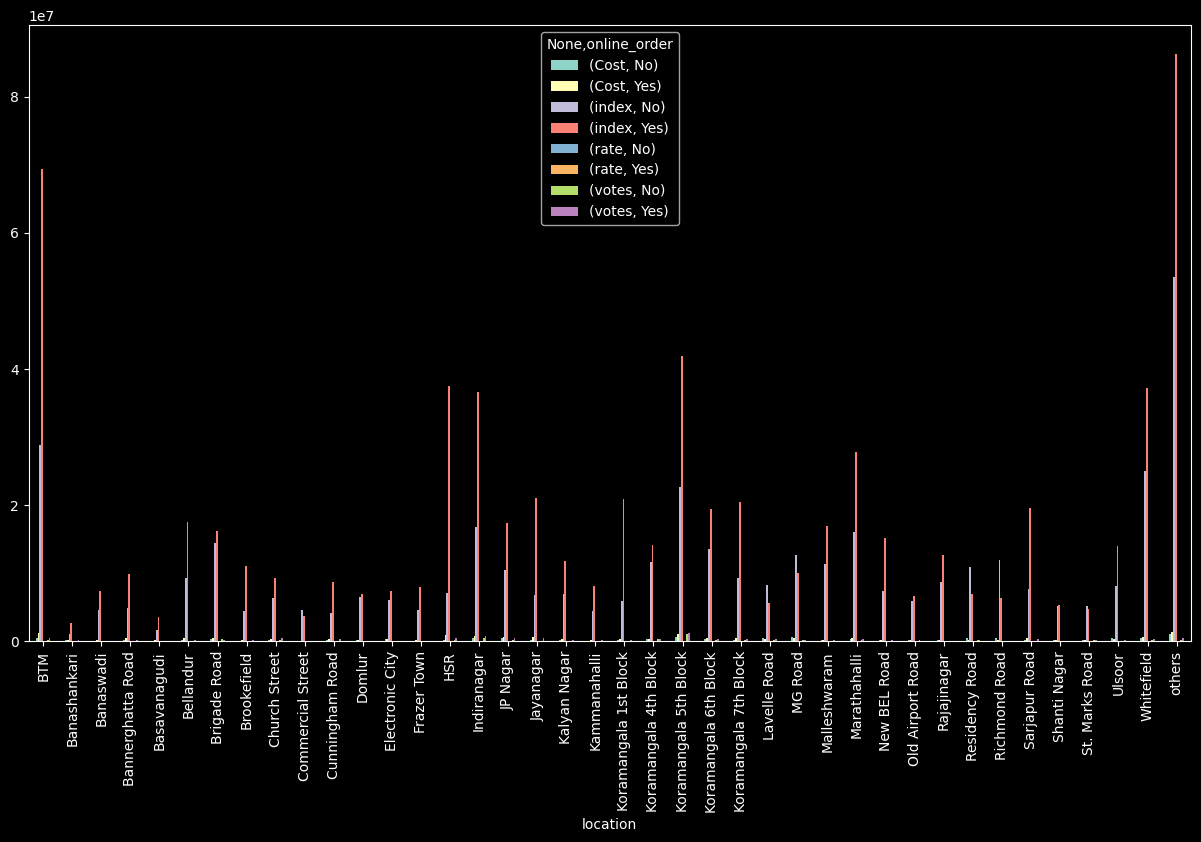

In [214]:
#Visualizing Online Order Facility, Location Wise
df1 = data1.groupby(['location','online_order'])['name'].count()
df1.to_csv('/content/location_online.csv')
df1 = pd.read_csv('/content/location_online.csv')
df1 = pd.pivot_table(data1, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1
df1.plot(kind = 'bar', figsize = (15,8))

<ipython-input-178-ac8ce53f896d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y = 'rate', data = data1, palette = 'inferno')


<Axes: xlabel='Type', ylabel='rate'>

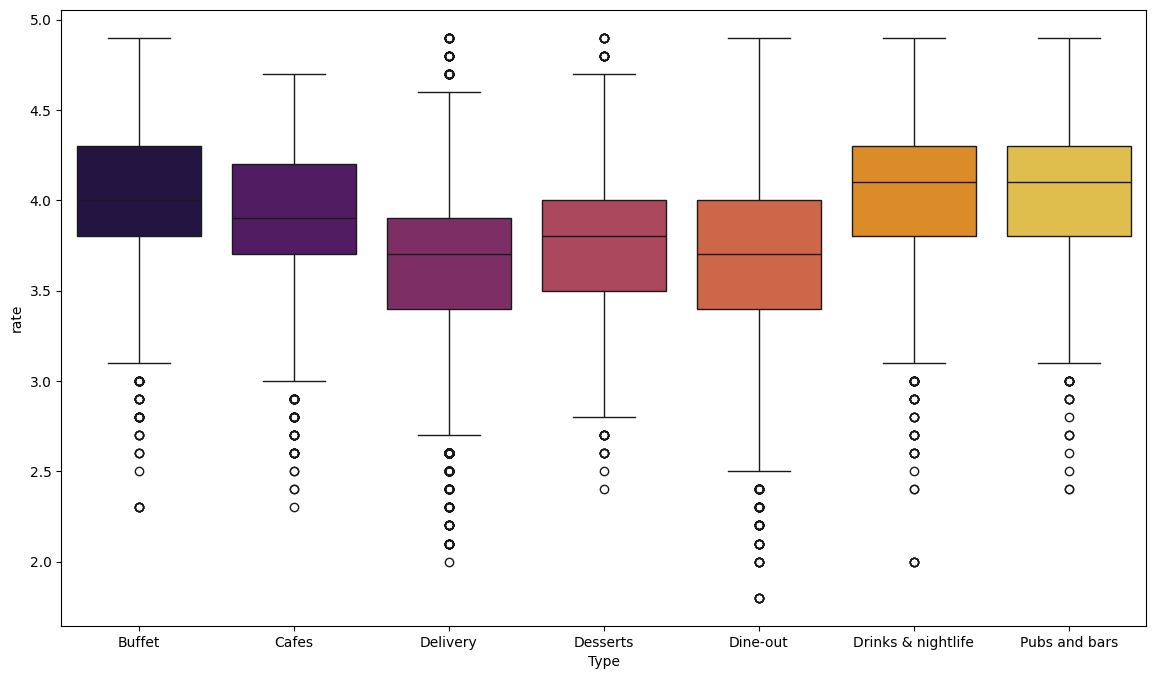

In [178]:
#Visualizing Types of Restaurents vs Rate
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = data1, palette = 'inferno')